In [1]:
dataset_path = '/home/jpauli/ds001506' #create path to where the data is stored

In [2]:
from bids import BIDSLayout #import all the neccessary modules
from bids.tests import get_test_data_path
import os

In [3]:
layout = BIDSLayout(dataset_path)
layout #print the layout of the dataset

BIDS Layout: .../home/jpauli/ds001506 | Subjects: 3 | Sessions: 77 | Runs: 36

**This dataset consists of three participants. Overall, there are 77 sessions and 36 runs.
Furthermore it is interesting to take a look at the amount of files in the dataset and the tasks that are done by the participants**

In [4]:
all_files = layout.get()
print("There are {} files in the layout.".format(len(all_files)))
print("\nThe first 10 files are:")
all_files[:10]

There are 1844 files in the layout.

The first 10 files are:


[<BIDSFile filename='/home/jpauli/ds001506/CHANGES'>,
 <BIDSJSONFile filename='/home/jpauli/ds001506/dataset_description.json'>,
 <BIDSFile filename='/home/jpauli/ds001506/README'>,
 <BIDSImageFile filename='/home/jpauli/ds001506/sub-01/ses-anatomy/anat/sub-01_ses-anatomy_T1w.nii.gz'>,
 <BIDSImageFile filename='/home/jpauli/ds001506/sub-01/ses-imagery01/anat/sub-01_ses-imagery01_inplaneT2.nii.gz'>,
 <BIDSJSONFile filename='/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.json'>,
 <BIDSImageFile filename='/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.nii.gz'>,
 <BIDSDataFile filename='/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_events.tsv'>,
 <BIDSJSONFile filename='/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-02_bold.json'>,
 <BIDSImageFile filename='/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-i

In [5]:
layout.get_tasks()

['imagery', 'perception']

**So only two types of tasks were performed by the participants. Tasks that rely on perception and tasks that rely on imagery. It is possible to also get the files filtered by task**

In [6]:
layout.get(subject='01', return_type='file', task="perception")[:10]

['/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-01_bold.json',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-01_bold.nii.gz',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-01_events.tsv',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-02_bold.json',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-02_bold.nii.gz',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-02_events.tsv',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-03_bold.json',


**We can see, that we have three different file types for the perception tasks. 
bold.json, bold.nii.gz and events.tsv**

In [7]:
layout.get_entities() #get all entitites (=BIDS defined keywords)

{'subject': <Entity subject (pattern=[/\\]+sub-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'session': <Entity session (pattern=[_/\\]+ses-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'sample': <Entity sample (pattern=[_/\\]+sample-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'task': <Entity task (pattern=[_/\\]+task-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'acquisition': <Entity acquisition (pattern=[_/\\]+acq-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'ceagent': <Entity ceagent (pattern=[_/\\]+ce-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'staining': <Entity staining (pattern=[_/\\]+stain-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'tracer': <Entity tracer (pattern=[_/\\]+trc-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'reconstruction': <Entity reconstruction (pattern=[_/\\]+rec-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'direction': <Entity direction (pattern=[_/\\]+dir-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'run': <Entity run (pattern=[_/\\]+run-(\d+), dtype=<class 'bids.layout.utils.PaddedInt'>)>,
 'proc': <Enti

### Lets explore the file of subject 01 a bit more

In [8]:
sub1 = layout.get(subject=['01'])[3]
# save the third file of subject one

In [9]:
sub1

<BIDSImageFile filename='/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.nii.gz'>

In [10]:
print("The type of this file is:")
type(sub1)

The type of this file is:


bids.layout.models.BIDSImageFile

In [11]:
print("The type of the intial layout file is:")
type(layout)

The type of the intial layout file is:


bids.layout.layout.BIDSLayout

**So we now do not have a BIDSLayout file anymore, but rather are dealing with a BIDSImageFile
We can now print the metadata associated with this particular file**

In [12]:
sub1.get_metadata()

{'EchoTime': 0.043,
 'FlipAngle': 80.0,
 'MagneticFieldStrength': 3.0,
 'Manufacturer': 'SIEMENS',
 'ManufacturersModelName': 'Verio',
 'MultibandAccelerationFactor': 4,
 'RepetitionTime': 2.0,
 'SliceTiming': [0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525],
 'TaskName': 'imagery'}

**The initial layout file can even be transformed into a *pandas dataframe* to get a rough overlook!**

In [13]:
dataframe = layout.to_df()
dataframe

entity,path,datatype,extension,run,session,subject,suffix,task
0,/home/jpauli/ds001506/dataset_description.json,NaN,.json,NaN,NaN,NaN,description,NaN
1,/home/jpauli/ds001506/sub-01/ses-anatomy/anat/...,anat,.nii.gz,NaN,anatomy,01,T1w,NaN
2,/home/jpauli/ds001506/sub-01/ses-imagery01/ana...,anat,.nii.gz,NaN,imagery01,01,inplaneT2,NaN
3,/home/jpauli/ds001506/sub-01/ses-imagery01/fun...,func,.json,01,imagery01,01,bold,imagery
4,/home/jpauli/ds001506/sub-01/ses-imagery01/fun...,func,.nii.gz,01,imagery01,01,bold,imagery
...,...,...,...,...,...,...,...,...
1839,/home/jpauli/ds001506/sub-03/ses-perceptionNat...,func,.json,08,perceptionNaturalImageTraining15,03,bold,perception
1840,/home/jpauli/ds001506/sub-03/ses-perceptionNat...,func,.nii.gz,08,perceptionNaturalImageTraining15,03,bold,perception
1841,/home/jpauli/ds001506/sub-03/ses-perceptionNat...,func,.tsv,08,perceptionNaturalImageTraining15,03,events,perception
1842,/home/jpauli/ds001506/README,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Exploration of events.tsv**

In [14]:
#wie viele kategorien, kategorien über zeit
#bilder plotten(anat, func), metadata anschauen(func)
#datalad install mitreinnehmen

#modell = svm? (also decision tree)

#abbildung google docs (regressors of no interest)(https://peerherholz.github.io/Cog_Com_Neuro_ML_DL/introduction/notebooks/neuroscience/statistical_maps.html)
#https://peerherholz.github.io/Cog_Com_Neuro_ML_DL/introduction/notebooks/neuroscience/statistical_analyses_MRI.html (BIDS ALS INPUT)
#samples = run, features = voxel

#https://peerherholz.github.io/Cog_Com_Neuro_ML_DL/introduction/notebooks/neuroscience/statistical_analyses_MRI.html#performing-statistical-analyses-on-bids-datasets

**First use the followings commands to inspect anatomical and function images and the event and json file of the functional session. This comes directly from datalad, which allows me to install the respective files of subject one in the first session to inspect**

datalad get sub-01/ses-anatomy/anat/sub-01_ses-anatomy_T1w.nii.gz

datalad get sub-01/ses-imagery01/anat/sub-01_ses-imagery01_inplaneT2.nii.gz

datalad get sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.json

datalad get sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.nii.gz

datalad get sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_events.tsv

In [15]:
data_path= '/home/jpauli/ds001506/sub-01/ses-anatomy/anat'


In [27]:
anat = os.path.join(data_path,'sub-01_ses-anatomy_T1w.nii.gz')

In [35]:
fmri_path = '/home/jpauli/ds001506/sub-01/ses-imagery01/anat'

In [36]:
fmri_img = os.path.join(fmri_path,'sub-01_ses-imagery01_inplaneT2.nii.gz')

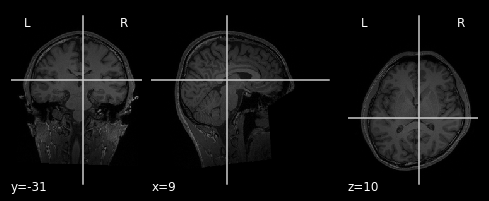

In [32]:
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show, plot_glass_brain
plot_anat(anat)

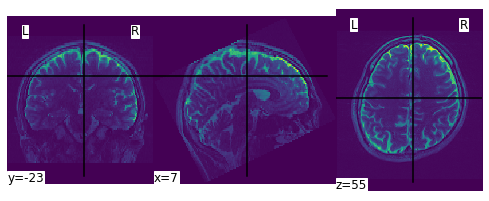

In [37]:
from nilearn.image import mean_img
mean_img = mean_img(fmri_img)
plot_img(mean_img)